# Loading SOMs

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
os.chdir('../../scripts')
from som.selfsom import SimpleSOMMapper
import som.somtools
from som.TransitSOM_release import CreateSOM, LoadSOM
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [2]:
kshape = (10,10)

In [9]:
som_array = LoadSOM('../10x10_kohonen.txt',kshape[0],kshape[1],121)

In [10]:
array = som_array.K

In [11]:
def plot_all_arrays(som, bins=np.arange(121), save=True,save_path='kohonen_pixels.png',kshape=kshape):
    """
    
    save_path = please remember to add the suffix (eg: .png)
    """
    fig, axes = plt.subplots(kshape[0],kshape[1], figsize=(50, 50),sharey=True)
    #fig.subplots_adjust(hspace=0.5)  # Adjust the spacing between subplots
    fig.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust the width and height spacing between subplots

    for x_pixel in range(kshape[0]):
        for y_pixel in range(kshape[1]):
            ax = axes[x_pixel, y_pixel]
            ax.scatter(bins, som[x_pixel, y_pixel], c='g',s=3)
            ax.set_title('Kohonen pixel at [{},{}]'.format(x_pixel, y_pixel))
            #ax.set_ylim(0, max(som[x_pixel, y_pixel]))
            #ax.text(0, 0.92, '[{},{}]'.format(x_pixel, y_pixel))
    
    if save:
        plt.savefig('{}'.format(save_path),dpi=200)  # Save the figure if save is True
    
    plt.show()

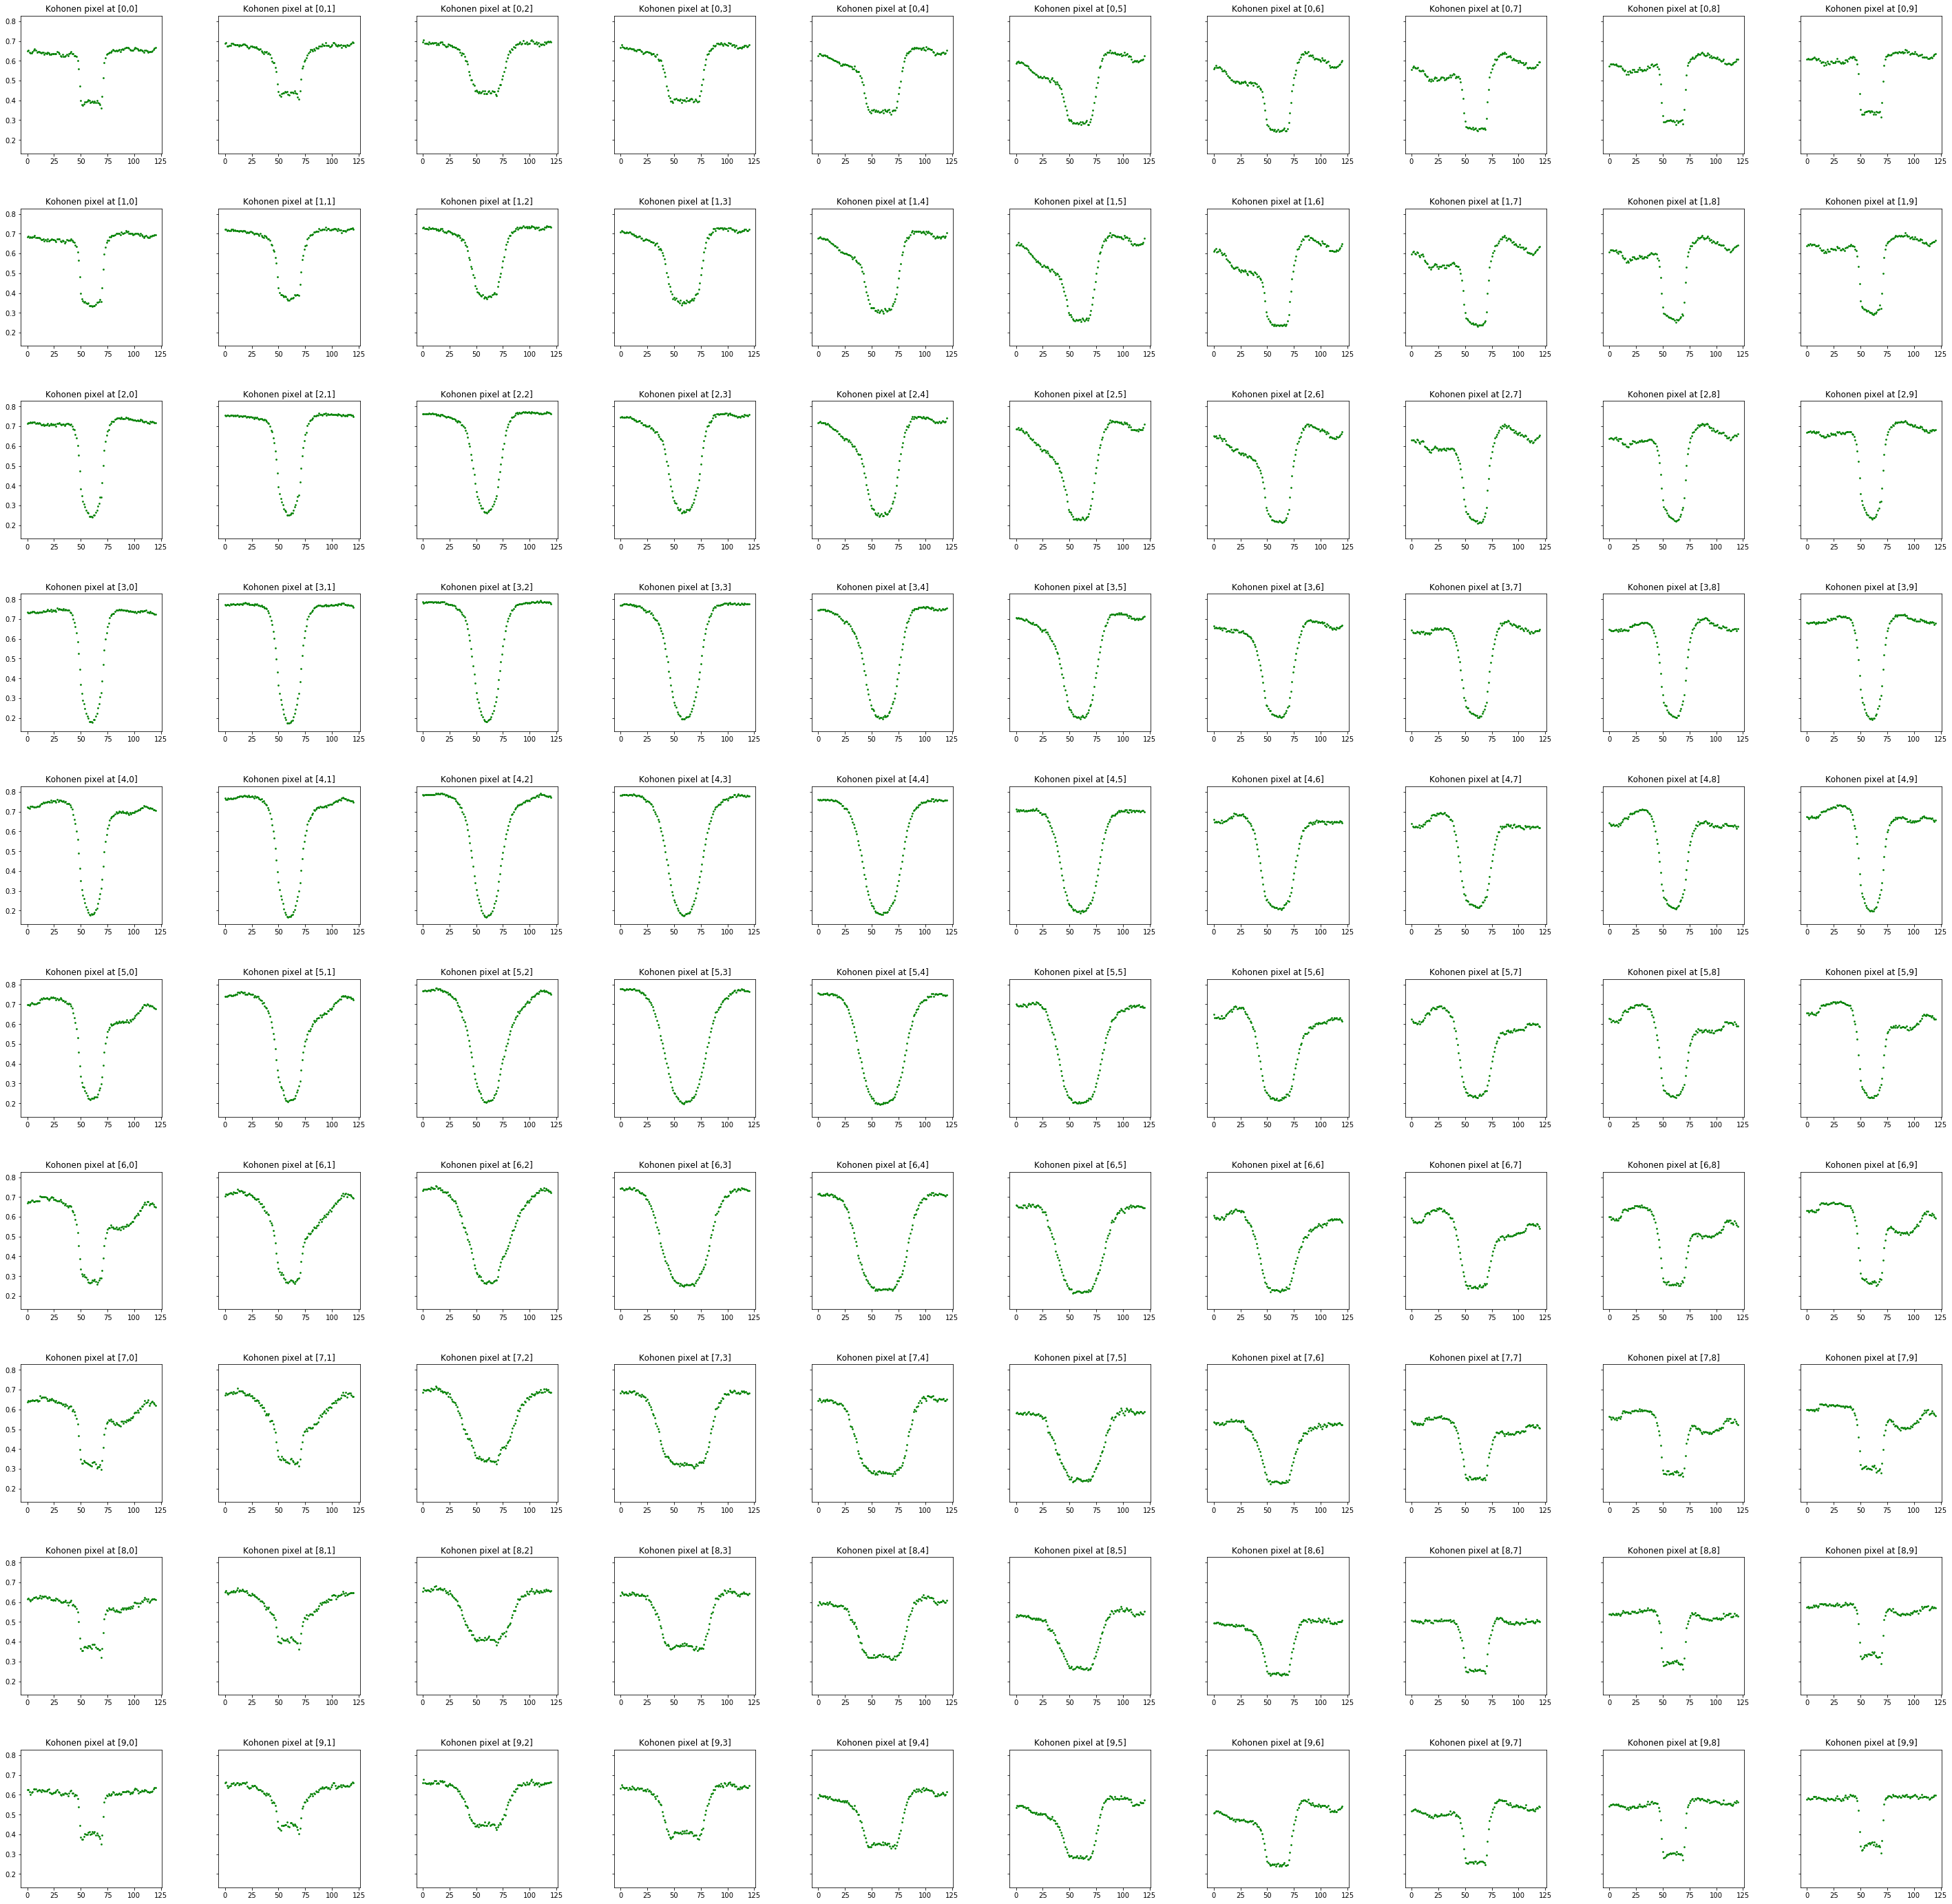

In [12]:
plot_all_arrays(array)

In [13]:
som_array

SimpleSOMMapper(kshape=(10, 10), niter=1, learning_rate=0.100000, iradius=10.000000)

In [9]:
# for i in range(np.shape(K)[0]):
#     dist = []
#     idx  = []
#     for j in range(np.shape(K)[1]):
        
#         ax[i,j].plot(wK, K[i][j])
        
#         dist_, idx_ = SOM._distance(K[i,j], training_spec, axis = 1)
        
#         index.append(idx_)
        
#         # Visual SOM grid with Object name and distances
#         dist.append(dist_)
#         idx.append(idx_)
#     objects.append(df.loc[idx,'Object'])
#     distances.append([dist])

In [10]:
dir(som_array)

['K',
 '_ClassWithCollections__descr',
 '_ClassWithCollections__params_set',
 '_DEV__doc__',
 '_K',
 '_Learner__auto_train',
 '_Learner__force_train',
 '_Learner__is_trained',
 '_Node__pass_attr',
 '_Node__postproc',
 '_Node__space',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__metaclass__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_a_filter',
 '_access_kohonen',
 '_apply_postproc',
 '_cadoc',
 '_call',
 '_collections',
 '_collections_template',
 '_compute_influence_kernel',
 '_custom_kwargs_sort_items',
 '_dqd',
 '_dqdshape',
 '_fa_filter',
 '_forward_data',
 '_forward_dataset',
 '_get_bmu',
 '_get_call_kwargs',
 '_initialization_func',
 '_known_attribs',
 '_paramscols',
 '_paramsdoc',
 '_pass_attr',
 '_postcall',
 '_posttrain',
 '_precall',
 '_pretrain',
 '_reverse_data',
 '_reverse_d

In [21]:
som_array.distance_metric(1,5)

5.0990195135927845

---

In [60]:
data = pd.read_csv('../10x10_200_iters_data.csv')
lightcurves = np.load('../candidate_lightcurves.npz', encoding='latin1')

In [16]:
dist_, idx_ = SOM._distance(K[,j], training_spec, axis = 1)

SyntaxError: invalid syntax (<ipython-input-16-eb4d6cfc5aec>, line 1)

In [38]:
som_array.ca['raw_results']

ConditionalAttribute(value=None, name='raw_results', doc='Computed results before invoking postproc. Stored only if postproc is not None.', index=2)

In [42]:
som_array.

<bound method SimpleSOMMapper.train of SimpleSOMMapper(kshape=(10, 10), niter=1, learning_rate=0.100000, iradius=10.000000)>

In [33]:
CreateSOM(som_array,e

TypeError: CreateSOM() got an unexpected keyword argument 'enable_ca'

In [32]:
som_array?

Signature:      som_array(self, ds)
Call signature: som_array(ds)
Type:           SimpleSOMMapper
String form:    <SimpleSOMMapper>
File:           ~/automated_exocomet_hunt/scripts/som/selfsom.py
Docstring:     
Mapper using a self-organizing map (SOM) for dimensionality reduction.

This mapper provides a simple, but pretty fast implementation of a
self-organizing map using an unsupervised training algorithm. It performs a
ND -> 2D mapping, which can for, example, be used for visualization of
high-dimensional data.

This SOM implementation uses squared Euclidean distance to determine
the best matching Kohonen unit and a Gaussian neighborhood influence
kernel.

Notes
-----
Available conditional attributes:

* calling_time+: Time (in seconds) it took to call the node
* raw_results: Computed results before invoking postproc. Stored only if postproc is not None.
* trained_dataset: The dataset it has been trained on
* trained_nsamples+: Number of samples it has been trained on
* trained_ta

In [43]:
def EucDistForPixel(x_pixel,y_pixel,som,som_Array,mapped):
    """
    Finds Euclidean Distances from a given som point (given by x_pixel, y_pixel) for all sources in
    som_Array which fall on that point
    """
    indices = []
    euc_distances = []
    xs = mapped[:,0]
    ys = mapped[:,1]
    for i in np.arange(len(xs)):
        if (xs[i] == x_pixel and ys[i] == y_pixel):
            indices.append(i)
    for i in np.arange(len(indices)):
        euc_distances.append(EucDist(som[x_pixel][y_pixel],som_Array[indices[i]]))
    return euc_distances

In [58]:
EucDistForPixel(10,10,som_array,array)

TypeError: EucDistForPixel() takes exactly 5 arguments (4 given)

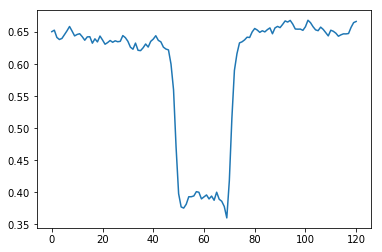

In [51]:
plt.plot(som_array.K[0][0])

In [55]:
test = som.somtools.KohonenLoad('../10x10_kohonen.txt')

In [56]:
test.shape

(10, 10, 121)

In [57]:
test[0][0]

array([0.65074965, 0.65307839, 0.64176918, 0.63853458, 0.64022513,
       0.64612806, 0.65211781, 0.65883579, 0.65160691, 0.64416916,
       0.64641916, 0.64754658, 0.64294903, 0.63741985, 0.6426444 ,
       0.64284939, 0.63279064, 0.63959568, 0.63477147, 0.64395379,
       0.63780804, 0.63116014, 0.63370053, 0.63698527, 0.63423627,
       0.63649524, 0.63505827, 0.63569766, 0.6446467 , 0.64144366,
       0.63576117, 0.62656971, 0.62339086, 0.63294398, 0.62170182,
       0.62116915, 0.62560289, 0.63151136, 0.62675069, 0.63561372,
       0.63913535, 0.64442898, 0.63718996, 0.63488844, 0.62661344,
       0.62366378, 0.62233533, 0.60015269, 0.56017698, 0.47071419,
       0.39802648, 0.37733136, 0.37551356, 0.3814882 , 0.39319835,
       0.3932464 , 0.39445927, 0.40115349, 0.400203  , 0.38990792,
       0.39297604, 0.39602129, 0.38981013, 0.39426605, 0.38773423,
       0.40029237, 0.38935594, 0.38617707, 0.3780548 , 0.36019191,
       0.418389  , 0.51539437, 0.59027873, 0.61627735, 0.63322